# Алгоритмы классификации

## MNIST Digits

Воспользуйтесь данными с https://www.kaggle.com/c/digit-recognizer/data 
Далее предполагается, что файлы test.csv и train.csv расположены в одной директории с notebook-ом.

В задании для оценивания качества работы алгоритмов требуется (самостоятельно) реализовать 10-тикратную перекрестную проверку (https://en.wikipedia.org/wiki/Cross-validation_(statistics)). В качестве ошибки используется средняя доля ошибок. Один раз (для kNN) в методических целях требуется дополнительно найти среднюю ошибку на обучающей части выборок перекрестной проверки. 

Разбиение на подвыборки должно быть одинаково для всех алгоритмов.

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import pylab as plt
%matplotlib inline
from math import log
from sklearn.svm import LinearSVC

In [2]:
import numpy as np

train_values = []
train_data_arr = []
a = False

infile = open('train.csv', 'r')
import csv
for row in csv.reader(infile):
    if a:
        train_values.append(row[0])
        train_data_arr.append(row[1:])
    a = True
infile.close()

for r in range(len(train_values)):
    train_values[r] = int(train_values[r])

train_data = []
for i in range(len(train_data_arr)):
    train_data.append(np.zeros((28, 28)))
    for count1 in range(28):
        for count2 in range(28):
            train_data[i][count1][count2] = int(train_data_arr[i][count1*28 + count2])

In [3]:
train_data_ravel = []
for count in range(1000):
    train_data_ravel.append(train_data[count].ravel())

In [ ]:
# примените метод kNN
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# нарисовать графики зависимости ошибки перекрестной проверки на обучающей части и на тестовой части от k. 
# Сделать вывод об оптимальном k.
# (*) какие еще параметры влияют на результат классификации и как?

In [14]:
from sklearn.model_selection import KFold    
    
means_knn_train = [0]
means_knn_test = [0]

means_knn_train_final = [0]
means_knn_test_final = [0]


kf = KFold(n_splits=10, random_state=42, shuffle=True)
    
# k итераций:
    
first = True    
    
for (train_indexes, test_indexes) in kf.split(train_data[:1000], train_values[:1000]):
    knn_train_x=[]
    knn_train_y=[]
    knn_test_x=[]
    knn_test_y=[]
    for count in range(len(train_indexes)):
        knn_train_x.append(train_data[train_indexes[count]].ravel())
        knn_train_y.append(train_values[train_indexes[count]])
        
    for count in range(len(test_indexes)):
        knn_test_x.append(train_data[test_indexes[count]].ravel())
        knn_test_y.append(train_values[test_indexes[count]])
        
    for k in range(1, 10):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(knn_train_x, knn_train_y)
            
        current_score = knn.score(knn_train_x, knn_train_y) # ошибка на train для этой итерации (из k)
        if (first):
            means_knn_train.append(1 - current_score)
        else:
            means_knn_train[k] += 1 - current_score
        
        current_score = knn.score(knn_test_x, knn_test_y) # ошибка на test для этой итерации (из k)
        if(first):
            means_knn_test.append(1 - current_score)
        else:
            means_knn_test[k] += 1 - current_score
    first = False
    
for k in range(1, len(means_knn_train)):
    means_knn_train_final.append(means_knn_train[k] / 10)

for k in range(1, len(means_knn_test)):
    means_knn_test_final.append(means_knn_test[k] / 10)
    


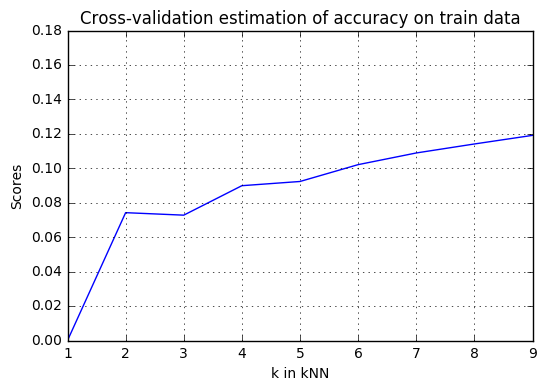

In [20]:
plt.title("Cross-validation estimation of accuracy on train data")
plt.plot(means_knn_train_final, label="Cross-validation estimation of accuracy on train data")
plt.ylabel('Scores')
plt.xlabel('k in kNN')
plt.xlim([1, 9])
plt.ylim([0, 0.18])
plt.grid()
plt.show()


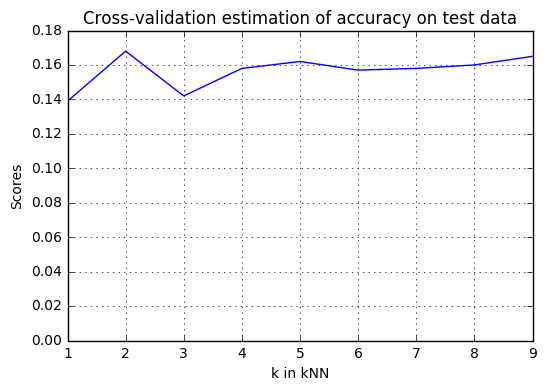

In [21]:
plt.title("Cross-validation estimation of accuracy on test data")
plt.plot(means_knn_test_final, label="Cross-validation estimation of accuracy on test data")
plt.ylabel('Scores')
plt.xlabel('k in kNN')
plt.xlim([1, 9])
plt.ylim([0, 0.18])
plt.grid()
plt.show()

Как видно из графика, отптимальное k = 3, т.к. при k = 1 на больших данных может возникнуть эффект "переобучения"

In [27]:
# примените метод SVM
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
# нарисовать график зависимости ошибки перекрестной проверки на тестовой части от регуляризации C (log масштаб перебора по C). 
# Сделать вывод об оптимальном C.
# Что означают и как влияют параметры multi_class, fit_intercept, intercept_scaling, class_weight, random_state?
# Нарисуйте график зависимости числа опорных векторов как функцию от C

means_svm = [0]


for k in range(-10, 11):
    clf = LinearSVC(C=10**k)
    scores = cross_val_score(clf, train_data_ravel[:1000], train_values[:1000], cv=10)
    means_svm.append(1-scores.mean())

print(means_svm[1:])

[0.42302502320208801, 0.24701697172332282, 0.18607524817521504, 0.14359152557397192, 0.15342013993773662, 0.1768670384505624, 0.19173965278235661, 0.19371129225399619, 0.19173965278235661, 0.19274975379245762, 0.19077811432081826, 0.19173965278235661, 0.19274975379245762, 0.19274975379245762, 0.19371129225399619, 0.19274975379245762, 0.19274975379245762, 0.19274975379245762, 0.19274975379245762, 0.19274975379245762, 0.19173965278235661]


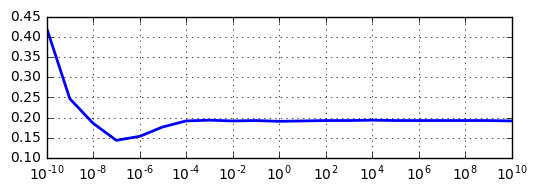

In [28]:
xlist = [pow(10, i) for i in range(-10, 11)]
fig = plt.figure()
ax = fig.add_subplot (2, 1, 1)
line = ax.plot(xlist, means_svm[1:], color='blue', lw=2)
ax.set_xscale('log')
plt.grid()
plt.show() 

In [29]:
print('Как видно из графика, отптимальное C = 10 ^', np.argmin(means_svm[1:]) - 10)

Как видно из графика, отптимальное C = 10 ^ -7


In [ ]:
# примените метод DT
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Как влияют и что означают параметры max_depth, min_samples_split, min_samples_leaf, criteria на качество классификатора?
# Выбрать наилучшие значения параметров по вашим экспериментам

In [ ]:
поделить min_mistake сразу на 10

In [4]:
from sklearn.tree import DecisionTreeClassifier
from itertools import product


c = list(product(range(1, 10), range(2, 10), range(1, 10), ["gini", "entropy"]))


min_mistake = 1

for m_d, m_s_s, m_s_l, cr in c:
    clf = DecisionTreeClassifier(random_state=42, max_depth = m_d,
                                 min_samples_split = m_s_s, min_samples_leaf = m_s_l, criterion = cr)

    scores = cross_val_score(clf, train_data_ravel[:1000], train_values[:1000], cv=5) #change 10
    mistake = 0
    for count in range(len(scores)):
        mistake += 1 - scores[count]
    mistake /= 5 # change 10
    if mistake < min_mistake:
        min_mistake = mistake
        m_d_best = m_d
        m_s_s_best = m_s_s
        m_s_l_best = m_s_l
        cr_best = cr
print('max_depth = ', m_d_best,'; min_samples_split = ', m_s_s_best,
      '; min_samples_leaf = ', m_s_l_best, 'criterion = ', cr_best,
      '\n Final mistake = ', min_mistake, '\n')

max_depth =  9 ; min_samples_split =  5 ; min_samples_leaf =  2 criterion =  entropy 
 Final mistake =  0.338600730274 



Параметр max_depth определяет максимальную высоту решающего дерева. Чем она больше, тем лучше до определенного момента (пока не возникнет эффект "переобучения"). Параметр min_samples_split отвечает за количество элементов, необходимых для разделения внутреннего узла. Параметр min_samples_leaf есть минимальное число элементов в листьях дерева. Параметр criteria представляет собой функцию оценки качества разбиения. Исходя из эксперимента, оптимальное значение равно "entropy".

In [ ]:
# примените метод NN
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
# Как влияет параметр hidden_layer_sizes на качество классификации?
# Выбрать наилучшее значение параметра по вашим экспериментам
# (***) воспользуйтесь NN из theano (http://deeplearning.net/software/theano/tutorial/ и http://deeplearning.net/tutorial/

In [10]:
from sklearn.neural_network import MLPClassifier

c = list(product(range(1, 10), range(1, 10)))

min_mistake = 1
         
for n, m in c:
    mlp = MLPClassifier(hidden_layer_sizes=(n, m), random_state=42)
    scores = cross_val_score(clf, train_data_ravel[:1000], train_values[:1000], cv=5) #change 10
    mistake = 0
    for count in range(len(scores)):
        mistake += 1 - scores[count]
    mistake /= 5 # change 10
    if mistake < min_mistake:
        min_mistake = mistake
        m_best = m
        n_best = n
print('tuple = ', m_best,'; length = ',n_best,
      '\n Final mistake = ', min_mistake, '\n')

tuple =  1 ; length =  1 
 Final mistake =  0.376866390397 



In [ ]:
# Сделайте вывод о наилучшем методе и его оптимальных параметрах

Таким образом, оптимальным является метод k ближайших соседей с параметром k = 3. Ошибка в этом случае равна приблезительно 15%. Точность, соответственно, 85%.

In [ ]:
# (*) Обучите наилучший метод с оптимальными параметрами на полной выборке, 
# примените к тестовой выборке соревнования и загрузите результат на kaggle